In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
!pwd

/kaggle/working


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 10)

In [4]:
data = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
data.shape

(8807, 12)

In [6]:
df = data.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
                ... 
release_year       0
rating             4
duration           3
listed_in          0
description        0
Length: 12, dtype: int64

<AxesSubplot:ylabel='type'>

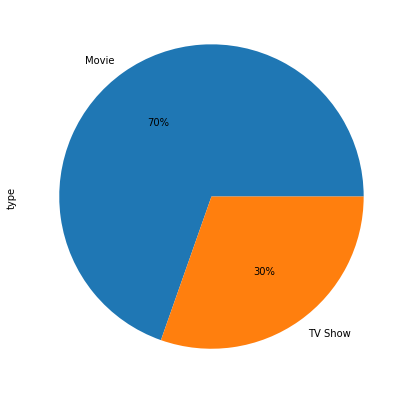

In [9]:
plt.figure(figsize=(7, 7))
df['type'].value_counts().plot(kind='pie',autopct='%1.0f%%')

In [10]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [11]:
df['director'].nunique()

4528

In [12]:
df['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [13]:
df['country'].nunique()

748

In [14]:
df['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [15]:
values = df['country'].value_counts()[:10].tolist()
labels = df['country'].value_counts()[:10].index.tolist()

In [16]:
print(labels)

['United States', 'India', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'Spain', 'France', 'Mexico', 'Egypt']


Text(0.5, 1.0, 'Top 10 countries with movies and tv shows')

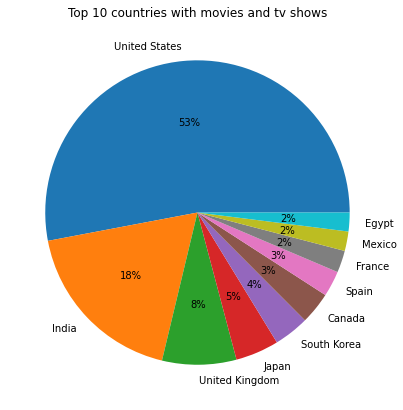

In [17]:
plt.figure(figsize=(7, 7))
plt.pie(values,labels=labels,autopct='%1.0f%%')
plt.title('Top 10 countries with movies and tv shows')

Text(0.5, 1.0, 'Top 10 countries with movies')

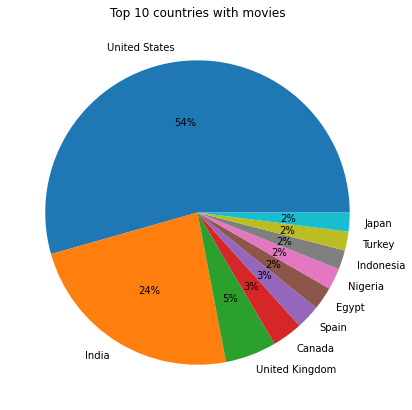

In [18]:
m = df[df['type']=='Movie']
m_values = m['country'].value_counts()[:10].tolist()
m_labels = m['country'].value_counts()[:10].index.tolist()

plt.figure(figsize=(7, 7))
plt.pie(m_values,labels=m_labels,autopct='%1.0f%%')
plt.title('Top 10 countries with movies')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


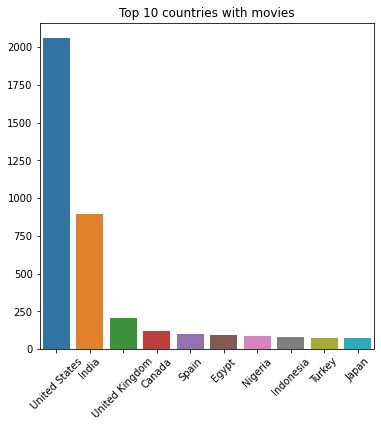

In [19]:
plt.figure(figsize=(6,6))
sns.barplot(m_labels,m_values)
plt.xticks(rotation=45)
plt.title('Top 10 countries with movies')
plt.show()

In [20]:
df['rating'].value_counts()

TV-MA     3207
TV-14     2160
TV-PG      863
R          799
PG-13      490
          ... 
NC-17        3
UR           3
74 min       1
84 min       1
66 min       1
Name: rating, Length: 17, dtype: int64

In [21]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [22]:
#new dataframe with year in new column
date = pd.DataFrame(df['date_added'])
added = date['date_added'].str.split(', ',expand = True)
date['MD'] = added[0]
date['Year'] = added[1]
date.head()

,date_added,MD,Year
0,"September 25, 2021",September 25,2021
1,"September 24, 2021",September 24,2021
2,"September 24, 2021",September 24,2021
3,"September 24, 2021",September 24,2021
4,"September 24, 2021",September 24,2021


In [23]:
def get_month(row):
    mon = row['MD'].split(' ')
    if len(mon) == 2:
        return mon[0]
    else:
        return mon[1]

In [24]:
def get_day(row):
    mon = row['MD'].split(' ')
    if len(mon) == 2:
        return mon[1]
    else:
        return mon[2]

In [25]:
# some of the Month-day combo was having ' November 1' extra space. So created a function to split the month and day from it and apply it on each row
date['Month'] = date.apply(get_month,axis=1)
date['Day'] = date.apply(get_day,axis=1)

In [26]:
date = date.drop(['date_added','MD'], axis=1, errors='ignore')

In [27]:
date.head()

,Year,Month,Day
0,2021,September,25
1,2021,September,24
2,2021,September,24
3,2021,September,24
4,2021,September,24


In [28]:
df = pd.concat([df, date],axis=1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,Month,Day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,24


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


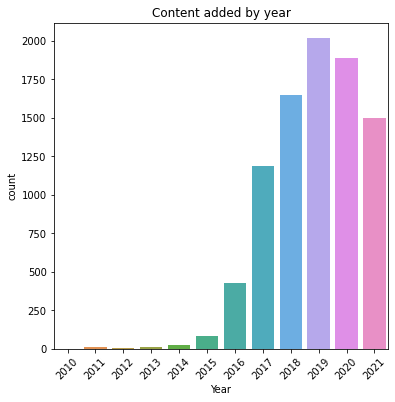

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(df['Year'],order=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'])
plt.xticks(rotation=45)
plt.title('Content added by year')
plt.show()

In [30]:
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df['Month'] = df['Month'].map(d).astype('Int8')

In [31]:
import datetime

def get_weekdays(x):
    t = datetime.datetime(int(x['Year']), int(x['Month']), int(x['Day']))
    return t.weekday()

df['WeekDay'] = df.apply(get_weekdays,axis=1)

In [32]:
df['WeekDay'].value_counts()

4    2498
3    1396
2    1298
1    1197
0     851
5     816
6     751
Name: WeekDay, dtype: int64

In [33]:
df.isnull().sum()

show_id           0
type              0
title             0
director       2634
cast            825
               ... 
description       0
Year              0
Month             0
Day               0
WeekDay           0
Length: 16, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Day', ylabel='count'>

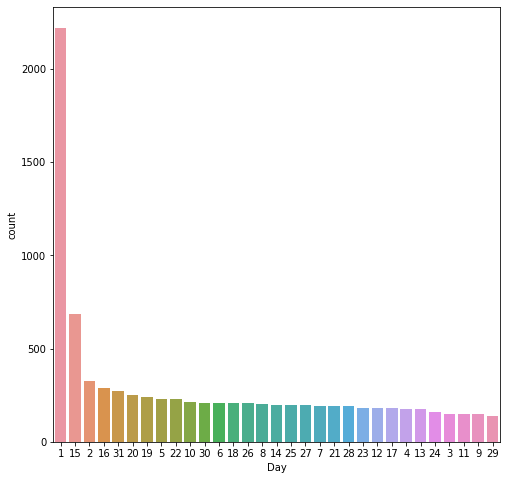

In [34]:
plt.figure(figsize=(8,8))
sns.countplot(df['Day'],order = df['Day'].value_counts().index)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='WeekDay', ylabel='count'>

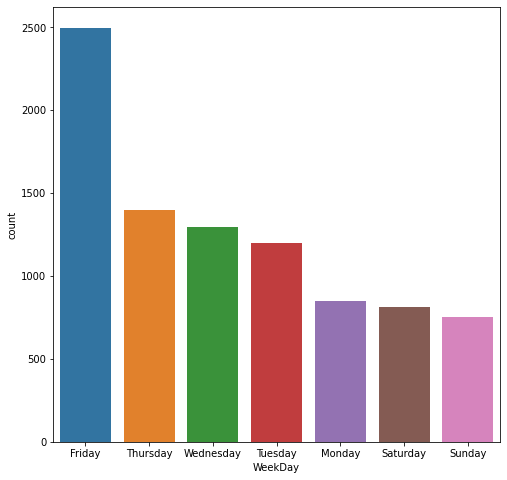

In [35]:
plt.figure(figsize=(8,8))
d = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
x = df['WeekDay'].map(d)
sns.countplot(x,order = x.value_counts().index)

In [36]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,Month,Day,WeekDay
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,5
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,4
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,4
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24,4
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,24,4


In [37]:
df['description'][0]

'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'

In [38]:
rec = df[['title','director','cast','listed_in','description']]
rec.head()

,title,director,cast,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,NaN,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [39]:
rec.isnull().sum()

title             0
director       2634
cast            825
listed_in         0
description       0
dtype: int64

In [40]:
rec['director'].replace(np.nan,'unknown',inplace=True)
rec['cast'].replace(np.nan,'unknown',inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [41]:
rec['cast'] = rec['cast'].str.replace(', ',' ')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
rec['listed_in'] = rec['listed_in'].str.replace(', ',' ')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
rec_wo_des = rec.drop(['description'],axis=1)

In [44]:
rec['combined'] = rec['title'] + ' ' + rec['director'] + ' ' + rec['cast'] + ' ' + rec['listed_in'] + ' ' + rec['description']
rec_wo_des['combined'] = rec_wo_des['title'] + ' ' + rec_wo_des['director'] + ' ' + rec_wo_des['cast'] + ' ' + rec_wo_des['listed_in']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
rec.drop(['cast','director','listed_in','description'],axis=1,inplace=True, errors='ignore')

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
rec.head()

,title,combined
0,Dick Johnson Is Dead,Dick Johnson Is Dead Kirsten Johnson unknown D...
1,Blood & Water,Blood & Water unknown Ama Qamata Khosi Ngema G...
2,Ganglands,Ganglands Julien Leclercq Sami Bouajila Tracy ...
3,Jailbirds New Orleans,Jailbirds New Orleans unknown unknown Docuseri...
4,Kota Factory,Kota Factory unknown Mayur More Jitendra Kumar...


In [47]:
rec['combined'][1]

'Blood & Water unknown Ama Qamata Khosi Ngema Gail Mabalane Thabang Molaba Dillon Windvogel Natasha Thahane Arno Greeff Xolile Tshabalala Getmore Sithole Cindy Mahlangu Ryle De Morny Greteli Fincham Sello Maake Ka-Ncube Odwa Gwanya Mekaila Mathys Sandi Schultz Duane Williams Shamilla Miller Patrick Mofokeng International TV Shows TV Dramas TV Mysteries After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(rec['combined'].str.lower())

tfidf_matrix.shape

(8807, 52938)

In [50]:
from sklearn.metrics.pairwise import linear_kernel

#cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [51]:
print(rec.index)

RangeIndex(start=0, stop=8807, step=1)


In [52]:
indices = pd.Series(rec.index, index=rec['title']).drop_duplicates()

In [53]:
type(indices)

pandas.core.series.Series

In [54]:
def get_recommendations(title, cosine_sim=cosine_sim):
    try:
        idx = indices[title]
    except:
        return None
    #print(f'idx={idx}')
    
    #Get similarity score with all movies
    sim_scores = list(enumerate(cosine_sim[idx]))
    #print(f'cosine_sim={cosine_sim[idx]}')
    
    # Sort the movies
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    #Top 10 movies. The 0th will be the movie itself
    sim_scores = sim_scores[1:11]
    #print(f'sim_scores={sim_scores}')
    
    # Get the movie indices
    match = [i[0] for i in sim_scores]
    score = [i[1] for i in sim_scores]
    dictionary = dict(zip(match, score))
    #print(dictionary)
    
    return dictionary

In [55]:
def recommend(title):
    result = get_recommendations(title)
    #print(result)
    if result is None:
        print(f'{title} not found in database')
    else:
        print(f'Movie related to {title} are: ')
        for i in result:
            print(f"{rec['title'].iloc[i]} with score {result[i]*100:.2f} %")

In [56]:
recommend('Avengers: Infinity War')

Movie related to Avengers: Infinity War are: 
Thor: Ragnarok with score 16.99 %
Black Panther with score 11.27 %
Her with score 10.78 %
Mark Gatiss: A Study in Sherlock with score 10.73 %
War Horse with score 10.42 %
The Little Prince with score 9.24 %
Chef with score 9.02 %
Chris Brown: Welcome to My Life with score 8.37 %
Crimson Peak with score 8.27 %
Legion with score 8.16 %


In [57]:
recommend('3 Idiots')

Movie related to 3 Idiots are: 
PK with score 31.00 %
Rang De Basanti with score 17.18 %
Sanju with score 16.48 %
Ek Main Aur Ekk Tu with score 15.60 %
War Chhod Na Yaar with score 14.96 %
Engineering Girls with score 14.60 %
Don with score 11.80 %
For Here or to Go? with score 11.73 %
Oh Darling Yeh Hai India with score 11.41 %
Andaz Apna Apna with score 11.31 %


In [58]:
recommend('Krishna Cottage')

Movie related to Krishna Cottage are: 
Kucch To Hai with score 14.53 %
Darna Mana Hai with score 14.08 %
Maine Pyaar Kyun Kiya with score 14.07 %
Yaadein with score 13.06 %
My Friend Pinto with score 12.58 %
Shiva with score 12.13 %
Krishna Balram with score 11.99 %
Don with score 10.93 %
Ramji Londonwaley with score 10.45 %
Hello Brother with score 10.27 %


In [59]:
recommend('Pineapple Express')

Movie related to Pineapple Express are: 
The Interview with score 20.21 %
Seth Rogen's Hilarity for Charity with score 16.07 %
The Adderall Diaries with score 11.38 %
Superbad with score 11.02 %
The Disaster Artist with score 11.01 %
3 Days to Kill with score 10.54 %
Girlfriend's Day with score 9.31 %
The Green Hornet with score 9.30 %
In Too Deep with score 8.45 %
Kung Fu Panda 2 with score 8.27 %


In [60]:
recommend('Hangover')

Hangover not found in database
